# Final Project Submission

Please fill out:
* Student name: Jamaal Smith
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Importation and Initial Impressions

In [46]:
import pandas as pd
KC=pd.read_csv('kc_house_data.csv')

In [47]:
KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


After importing the data, for the purpose of this analysis, the sale price of a home in Kings County is the dependent variable that we desire to build a regression model for to predict future sale prices based on various features of a home that are represented in the . 

Cursory review of the first five rows above allows for some preliminary insights. First, it is likely that the waterfront column isn't continuous data, but categorical. By this, it is possible that a 0 represents that a property is not near the water and 1 means that it is. The same conclusion may also be later reached for the view and condition columns. Taking note of such data features will inform decisions made during the preprocessing stage of model design so that the regression model can be as accurate as possible. 

## Preliminary Analysis of Data Set

The next two cells of code are designed to ascertain more detail about the dataset. Primarily, this exploratory analysis is designed to identify the magnitude of null values in the columns. With 21597 entries, columns that have less entries possibly have null values that must be addressed by methods such as replacement or ommision.  

Also, the info method provides important information around the type of data present in each column. Some columns that have numerical data might have to be changed to a float or integer should they be inputed, for example, as as object.

Additionally, 

In [48]:
KC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [49]:
KC.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Null Values
The following two potential predictor variable have sizable null values: waterfront and yr_renovated. During the rest of preprocessing, decisions must be made as to whether sales without values in waterfront and yr_renovated should be included in the final data set or removed. If it is determined they should remain in the dataset, what method should be used to provide substiute values.

## Data Types
The two columns that are the object datatype are date and sqft_basement. While some thought is still needed at this point to determine if date of sale should be a predictor variable in the regression model, the sq_ft basement column's datatype will definitely have to be changed to either float64 or int64.

# Preproccessing

Two columns that I will omit as predictor variables for the regression model are the ID and Date columns. The ID assigned to a home sale has no impact on its final sale price. The date of sale column also has no influence on a home's sale price as a stand-alone value. By this, the date of sale data doesn't provide color on real estate conditions at the time. Even if the date of sale column provided such insight, that could change the purpose of the regression model from assessing intrinsic features of a home to determine its potential sale value. 

After further review of possible predictor variables that are represented as columns in the dataframe, the zipcode, lat and long columns can also be omitted from the regression model. This decision is made based on the logic that intrinsic values of a home should determine its value. These three columns only provide information on the location of the home.

Duplicative columns that separate square foot into a measure of the basement and above living space can also be omitted as the sqft_living column has this data already tabulated

In [50]:
KC_RM = KC_data.drop(['id','date','zipcode','lat','long','sqft_above','sqft_basement'],axis=1)
KC_RM.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,NaN,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,1800,7503


## Categorical Variables

As mentioned earlier, the following columns are suspected of representing categorical variables. By plotting scatterplots of the data, we can determine if the data is continuous or categorical. If categorical, the scatterplots will not look like clouds, but more like vertical lines. It will also be worth examining the number of unique values in each column. With over 2000 entries, columns with a low number of unique values can be considered categorical.

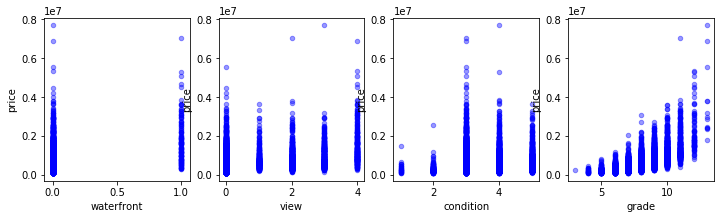

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for xcol, ax in zip(['waterfront','view', 'condition','grade'], axes):
    KC_RM.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [52]:
KC_RM[['waterfront','view', 'condition','grade']].nunique()

waterfront     2
view           5
condition      5
grade         11
dtype: int64

Based on the linear nature of the scatterplots and low number of unique values shown above, the waterfront, view, condition and grade columns are categorical. To prepare these columns for the regression model, dummy variables will be utilized.

In [53]:
waterfront_dummies = pd.get_dummies(KC_RM['waterfront'], prefix = 'wat',drop_first=True)
view_dummies = pd.get_dummies(KC_RM['view'], prefix = 'view', drop_first=True)
condition_dummies = pd.get_dummies(KC_RM['condition'], prefix = 'cond', drop_first=True)
grade_dummies = pd.get_dummies(KC_RM['grade'],prefix = 'grade', drop_first=True)



In [60]:
KC_RMD = KC_RM.drop(['waterfront','view','condition','grade'],axis=1)
KC_RMD = pd.concat([KC_RMD,waterfront_dummies,view_dummies,condition_dummies,grade_dummies], axis=1)
#KC_RMD.info()

# Multicollinearity of Features

The heatmap shown below provides a visual way to inspect for high correlation between predictor variables. Should preditor variables have high correlations, or regression results will be affected and this must be addressed during design of the regression model.

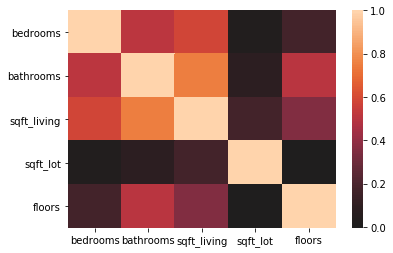

In [65]:
KC_pred = KC_RMD.iloc[:,1:6]
import seaborn as sns
sns.heatmap(KC_pred.corr(), center=0);

The above heatmap shows that the correlation between bathrooms and sqft_living should be further inspected as it appears their correlation is approaching 80%.

In [67]:
abs(KC_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
bedrooms,True,False,False,False,False
bathrooms,False,True,True,False,False
sqft_living,False,True,True,False,False
sqft_lot,False,False,False,True,False
floors,False,False,False,False,True


Upon further inspection, we must be careful not to include both bathrooms and sqft_living in the regression model as they might exhibit some multicollinearity.

# Log Transformations

A final step in preparing the data for analysis is reviewing the distribution of the predictor variables. If their histograms do not resemble a bell curve, log transformations should be applied to make the data as normally distributed as possible.

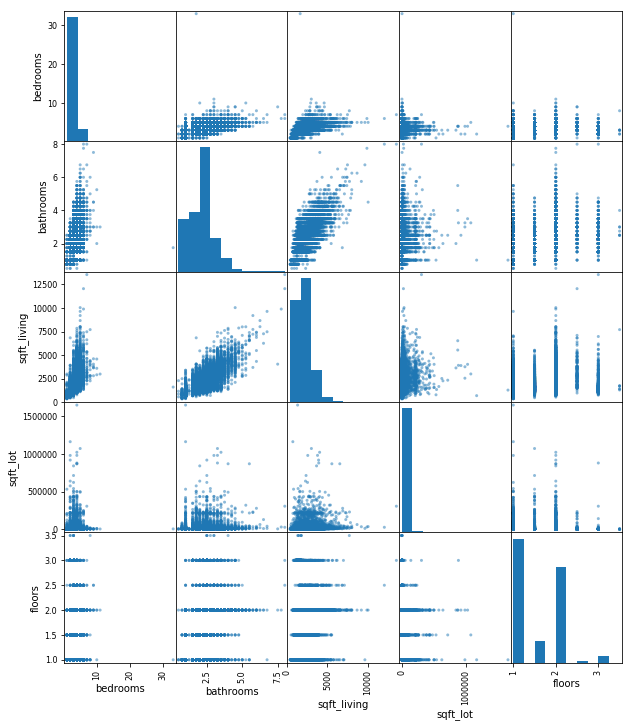

In [71]:
xcols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
pd.plotting.scatter_matrix(KC_RMD[xcols], figsize=(10,12))
plt.show()

C:\anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


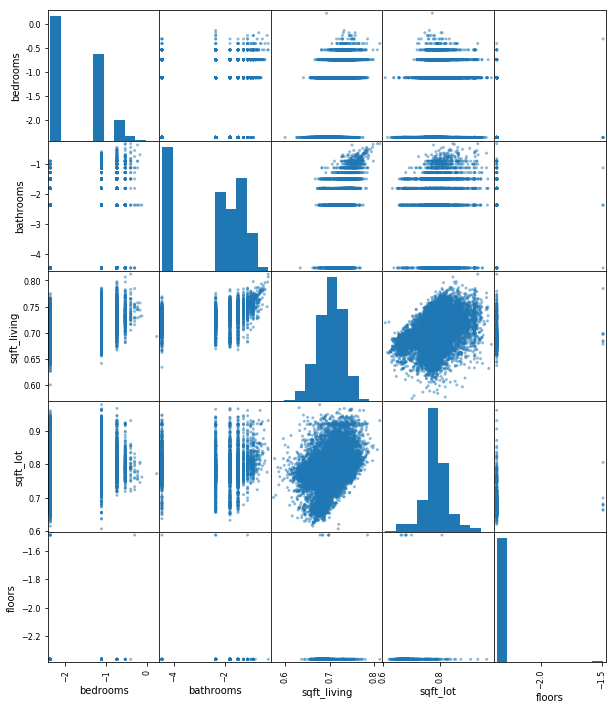

In [74]:
import numpy as np
non_normal = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
for feat in non_normal:
    KC_RMD[feat] = KC_RMD[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(KC_RMD[non_normal], figsize=(10,12));

After performing the log transformation, the distributions of the sqft_living and sqft_lot variables appear to be the most normally distributed